In [2]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5,5)

In [28]:
G1 = nx.Graph()

In [29]:
G1.add_nodes_from(
    [
        1, 
        2, 
        3, 
        4],
    color = 'blue',
    label = 'normal'
)
G1.nodes[1]['label'] = 'special'
G1.nodes[2]['label'] = 'special'

In [30]:
G1.add_edges_from(
    [
        (1, 2), 
        (2, 3), 
        (3, 4), 
        (4, 1),
        (1, 3)
    ]
)

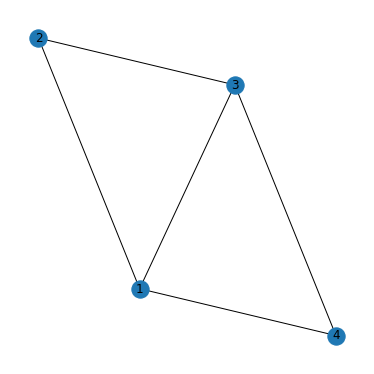

In [31]:
nx.draw(G1, with_labels=True)

In [32]:
G2 = nx.Graph()
G2.add_nodes_from(['a', 'b'])
G2.nodes['a']['label'] = 'special'
G2.nodes['b']['label'] = 'special'
G2.add_edges_from([('a','b')])

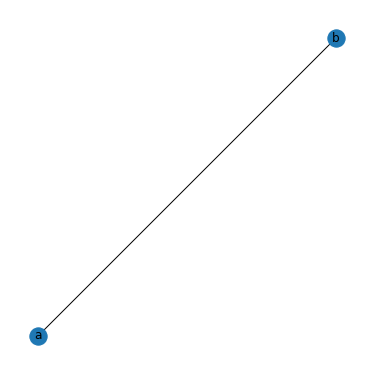

In [33]:
nx.draw(G2, with_labels=True)

In [34]:
GM = nx.algorithms.isomorphism.GraphMatcher(G1, G2, node_match=lambda n1,n2: n1['label']==n2['label'])

In [35]:
GM.subgraph_is_isomorphic()

True

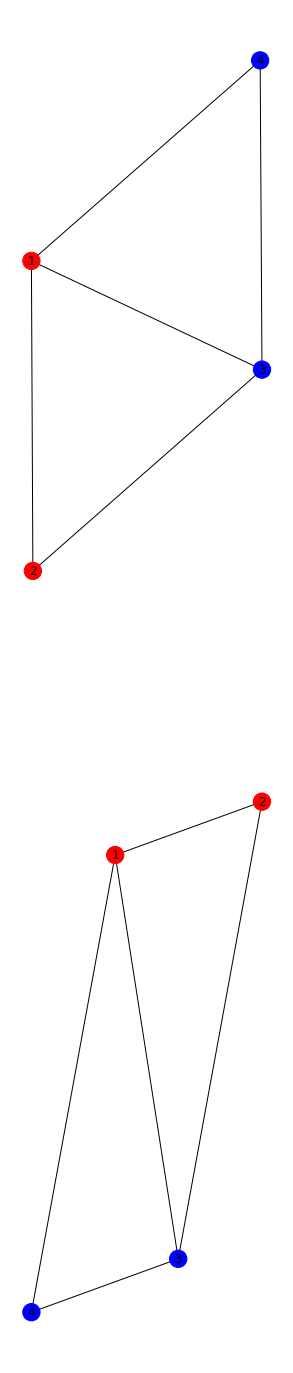

In [36]:
isomorphisms = [g for g in GM.subgraph_isomorphisms_iter()]
plt.rcParams["figure.figsize"] = (5,25)
for i, g in enumerate(isomorphisms):
    g1_iso_nodes = g.keys()
    for node in g1_iso_nodes:
        G1.nodes[node]['color'] = 'red'
    plt.subplot(len(isomorphisms), 1, i+1)
    nx.draw(G1, with_labels=True, node_color=[G1.nodes[i]['color'] for i in G1.nodes])
    for node in g1_iso_nodes:
        G1.nodes[node]['color'] = 'blue'
plt.rcParams["figure.figsize"] = (5,5)

In [37]:
isomorphisms_filtered = []

for i in range(len(isomorphisms)):
    for j in range(i+1,len(isomorphisms)):
        if isomorphisms[i].keys() == isomorphisms[j].keys():
            isomorphisms_filtered.append(isomorphisms[i])
            
isomorphisms_filtered

[{1: 'a', 2: 'b'}]

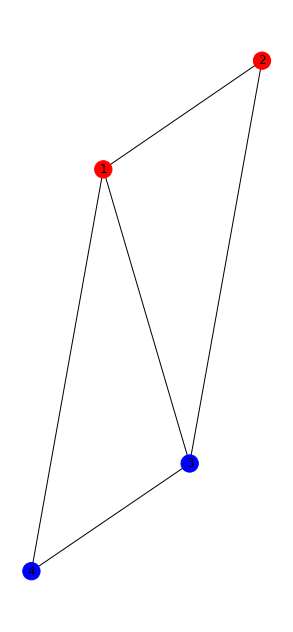

In [38]:
plt.rcParams["figure.figsize"] = (5,25)
for i, g in enumerate(isomorphisms_filtered):
    g1_iso_nodes = g.keys()
    for node in g1_iso_nodes:
        G1.nodes[node]['color'] = 'red'
    plt.subplot(len(isomorphisms), 1, i+1)
    nx.draw(G1, with_labels=True, node_color=[G1.nodes[i]['color'] for i in G1.nodes])
    for node in g1_iso_nodes:
        G1.nodes[node]['color'] = 'blue'
plt.rcParams["figure.figsize"] = (5,5)

In [71]:
from typing import Dict, List
import networkx as nx

def find_isomorphisms(G_main: nx.Graph, G_to_find: nx.Graph, filter_duplicates=True) -> List[Dict]:
	GM = nx.algorithms.isomorphism.GraphMatcher(G_main, G_to_find, node_match=lambda n1,n2: n1['label']==n2['label'])
	
	if not GM.subgraph_is_isomorphic():
		return []
	
	isomorphisms = list(GM.subgraph_isomorphisms_iter())
	
	if filter_duplicates and len(isomorphisms) > 1:
		isomorphisms_filtered = []
		for i in range(len(isomorphisms)):
			for j in range(i+1,len(isomorphisms)):
				if isomorphisms[i].keys() == isomorphisms[j].keys():
					isomorphisms_filtered.append(isomorphisms[i])
		
		isomorphisms = isomorphisms_filtered
		
	return isomorphisms

In [72]:
find_isomorphisms(G1, G2)

[{1: 'a', 2: 'b'}]

In [75]:
class P1():
    left = nx.Graph()
    left.add_node(1, label='El')

    @staticmethod
    def apply(G: nx.Graph, offset = 1):
        El_node = None
        
        # find isos and get pick first one
        isomorphisms = find_isomorphisms(G, P1.left)
        if len(isomorphisms) < 1:
            return False
        iso = isomorphisms[0]
        nodes_in_G = list(iso.keys())
        if len(nodes_in_G) != 1:
            return False
        node_id = nodes_in_G[0]
        El_node = G.nodes(data=True)[node_id]

        if not El_node: return False

        El_node['label'] = 'el'
        (pos_x, pos_y) = El_node['pos']
        G.add_node(node_id+1, label='I', pos=(pos_x, pos_y-offset))
        G.add_edge(node_id, node_id+1)

        I_node = (node_id+1, G.nodes[node_id+1])
        (pos_x, pos_y) = I_node[1]['pos']

        G.add_node(I_node[0]+1, label='E', pos=(pos_x-offset/2, pos_y-offset/2))
        G.add_edge(I_node[0], I_node[0]+1)
        
        G.add_node(I_node[0]+2, label='E', pos=(pos_x+offset/2, pos_y-offset/2))
        G.add_edge(I_node[0], I_node[0]+2)
        
        G.add_node(I_node[0]+3, label='E', pos=(pos_x+offset/2, pos_y+offset/2))
        G.add_edge(I_node[0], I_node[0]+3)
        
        G.add_node(I_node[0]+4, label='E', pos=(pos_x-offset/2, pos_y+offset/2))
        G.add_edge(I_node[0], I_node[0]+4)

        G.add_edge(I_node[0]+1, I_node[0]+2)
        G.add_edge(I_node[0]+2, I_node[0]+3)
        G.add_edge(I_node[0]+3, I_node[0]+4)
        G.add_edge(I_node[0]+4, I_node[0]+1)

        return True

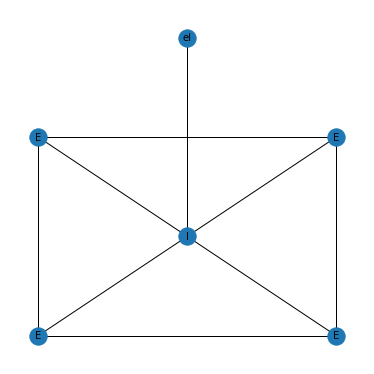

In [76]:
G = nx.Graph()
G.add_node(1, node_color='red', label='El', pos=(0, 0))

P1.apply(G)

nx.draw(G, nx.get_node_attributes(G,'pos'), labels=nx.get_node_attributes(G,'label'), font_size=10)